## Tema 4. Diseño de Algoritmos de Control.

### Ejemplo diseño de un PID.

**Enunciado**. Sea un sistema cuya respuesta sigue la siguiente ecuación discreta:

$$ y(k) - 0.8 y(k-1) = u(k-2) $$

con período de muestreo $T = 1$ seg.

Obtener el valor de $K_u$ del método de sintonización de Ziegler-Nichols y ajustar las ganancias del regulador PID.

**Solución.** Para obtener $K_u$, realimentamos el sistema y aumentamos la ganancia del lazo $K_u$ hasta que el sistema presente un comportamiento oscilatorio:

In [120]:
import numpy as np
import matplotlib.pyplot as plt


In [121]:
N = 20
Ku = 0.75
ref = np.ones(N)
y = np.zeros(N)
u = np.zeros(N)
for k in range(2,N):
    y[k] = 0.8*y[k-1] + u[k-2]
    e = ref[k] - y[k]
    u[k] = Ku * e

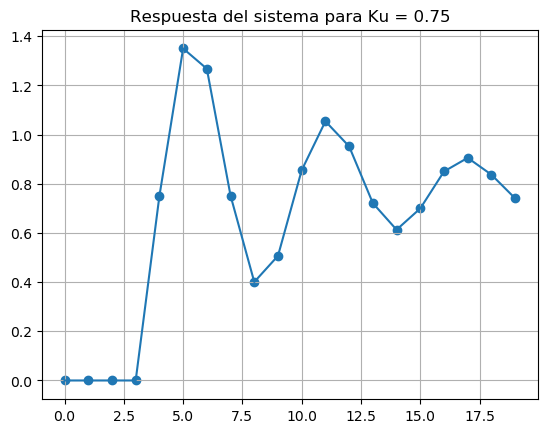

In [122]:
plt.scatter(range(N), y)
plt.plot(range(N), y)
plt.title("Respuesta del sistema para Ku = " + str(Ku))
plt.grid()
plt.show()


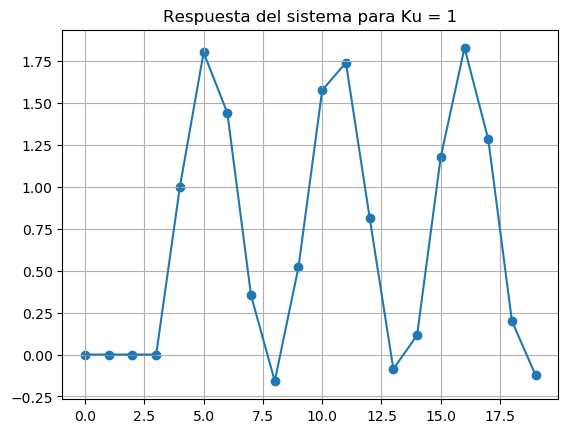

In [123]:
N = 20
Ku = 1
ref = np.ones(N)
y = np.zeros(N)
u = np.zeros(N)
for k in range(2,N):
    y[k] = 0.8*y[k-1] + u[k-2]
    e = ref[k] - y[k]
    u[k] = Ku * e
plt.scatter(range(N), y)
plt.plot(range(N), y)
plt.title("Respuesta del sistema para Ku = " + str(Ku))
plt.grid()
plt.show()

Consideramos que $K_u \approx 1 $ y que $T_u \approx 6$ segundos. A continuación, calculamos los parámetros del PID:

In [124]:
T = 1 # Período de muestreo
Tu = 6*T # Periodo de oscilación
Kc = 0.6*Ku
Ti = Tu/2
Td = Tu/8

In [125]:
def pid(k, u, e, Kc, Ti, Td, T):
    c0 = Kc*(1+(Td/T))
    c1 = Kc*(-1+(T/Ti) - (2*Td/T))
    c2 = Kc*(Td/T)
    return u[k-1] + c0*e[k] + c1*e[k-1] + c2*e[k-2]


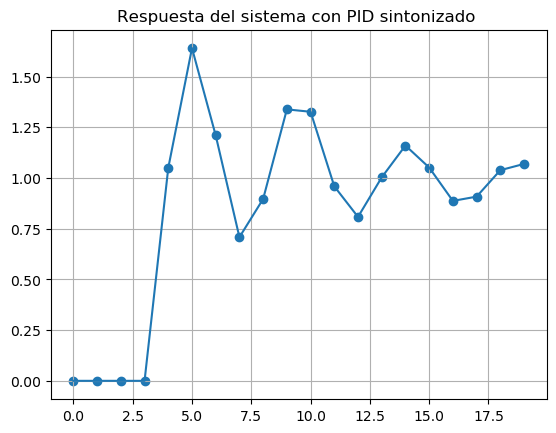

In [126]:
T = 1
N = 20
ref = np.ones(N)
y = np.zeros(N)
u = np.zeros(N)
e = np.zeros(N)
for k in range(2,N):
    y[k] = 0.8*y[k-1] + u[k-2]
    e[k] = ref[k] - y[k]
    u[k] = pid(k,u,e,Kc,Ti,Td,T)
plt.scatter(range(N), y)
plt.plot(range(N), y)
plt.title("Respuesta del sistema con PID sintonizado ")
plt.grid()
plt.show()

## Ejercicio

**Enunciado.** Se desea controlar un proceso industrial cuyo comportamiento viene dado por la ecuación discreta:

$$y(k)-y(k-1)+0,21y(k-2)=0,21u(k-2)$$

con $T=0.1$ seg.

Búsquese una respuesta sin oscilaciones, sin error y con tiempo de estabilización lo menor posible.

**Solución**. Implementamos la función del sistema y del PID:

In [127]:
def sistema(k,u,y):
    return y[k-1] - 0.21*y[k-2] + 0.21*u[k-2]

def pid(k, u, e, Kc, Ti, Td, T):
    c0 = Kc*(1+(Td/T))
    c1 = Kc*(-1+(T/Ti)-(2*Td/T))
    c2 = Kc*(Td/T)
    return u[k-1] + c0*e[k] + c1*e[k-1] + c2*e[k-2]

Buscamos a continuación el valor de $K_u$ que lleva el sistema a estado oscilatorio:

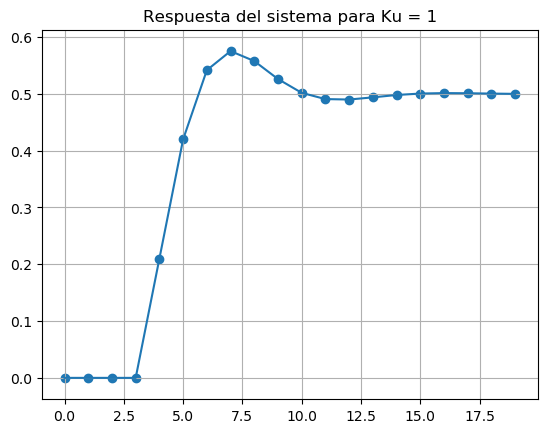

In [128]:
N = 20
Ku = 1
ref = np.ones(N)
y = np.zeros(N)
u = np.zeros(N)
e = np.zeros(N)
for k in range(2,N):
    y[k] = sistema(k,u,y)
    e[k]= ref[k] - y[k]
    u[k] = Ku * e[k]
t = np.arange(0,N*T,T)
plt.scatter(t, y)
plt.plot(t, y)
plt.title("Respuesta del sistema para Ku = " + str(Ku))
plt.grid()
plt.show()

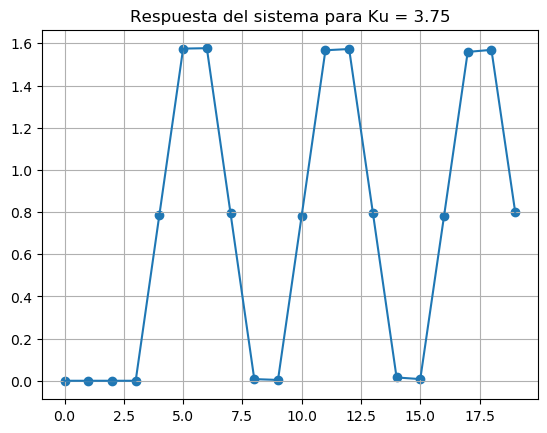

In [129]:
N = 20
Ku = 3.75
ref = np.ones(N)
y = np.zeros(N)
u = np.zeros(N)
e = np.zeros(N)
for k in range(2,N):
    y[k] = sistema(k,u,y)
    e[k]= ref[k] - y[k]
    u[k] = Ku * e[k]
t = np.arange(0,N*T,T)
plt.scatter(t, y)
plt.plot(t, y)
plt.title("Respuesta del sistema para Ku = " + str(Ku))
plt.grid()
plt.show()

Observamos que $K_u \approx 3.75$ y que $T_u \approx 0.6$ segs.

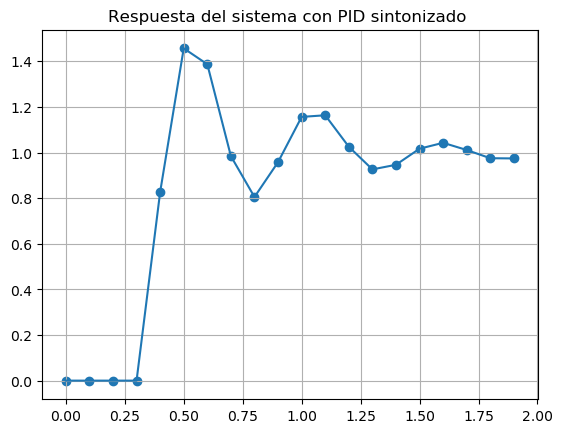

In [130]:
T = 0.1
Ku = 3.75
Tu = 6*T
Kc = 0.6*Ku
Ti = Tu/2
Td = Tu/8
ref = np.ones(N)
y = np.zeros(N)
u = np.zeros(N)
e = np.zeros(N)
for k in range(2,N):
    y[k] = sistema(k,u,y)
    e[k] = ref[k] - y[k]
    u[k] = pid(k,u,e,Kc,Ti,Td,T)
t = np.arange(0,N*T,T)
plt.scatter(t, y)
plt.plot(t, y)
plt.title("Respuesta del sistema con PID sintonizado ")
plt.grid()
plt.show()

A partir de los parámetros del PID sintonizados por el método de Ziegler-Nichols, realizamos los ajustes necesarios con tal de verificar las especificaciones de respuesta transitoria y régimen permanente.

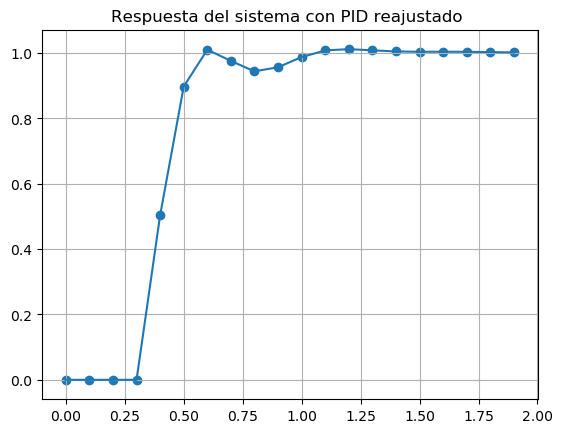

In [131]:
T = 0.1
Ku = 3.75
Tu = 6*T
Kc = 0.4*Ku
Ti = Tu/1.5
Td = Tu/10
ref = np.ones(N)
y = np.zeros(N)
u = np.zeros(N)
e = np.zeros(N)
for k in range(2,N):
    y[k] = sistema(k,u,y)
    e[k] = ref[k] - y[k]
    u[k] = pid(k,u,e,Kc,Ti,Td,T)
t = np.arange(0,N*T,T)
plt.scatter(t, y)
plt.plot(t, y)
plt.title("Respuesta del sistema con PID reajustado ")
plt.grid()
plt.show()

## Ejercicio

**Enunciado.** Se desea controlar un proceso industrial cuyo comportamiento viene dado por la ecuación discreta:

$$y(k)-0,2y(k-1)+0,1y(k-2)=0,1u(k-2)$$ 

con $T=0.5$ seg.

Búsquese una respuesta con oscilaciones, sin error, con menor sobreoscilación y con tiempo de estabilización lo menor posible

**Solución.** Procedemos de la misma forma que en el caso anterior.